In [1]:
#import torch modules
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch import optim as optim
import torch.nn.functional as F
import torchmetrics
# import for visualization
from matplotlib import pyplot as plt
import math
from tqdm import tqdm
import numpy as np
# import biotorch modules
from biotorch.layers import fa, dfa, usf, brsf, frsf

In [2]:
# loading the dataset
training_parameters = {
    "img_size": 28,
    "n_epochs": 12,
    "batch_size": 64,
    "learning_rate": 0.0002,
}
# define a transform to 1) scale the images and 2) convert them into tensors
transform = transforms.Compose([
    transforms.Resize(training_parameters['img_size']), # scales the smaller edge of the image to have this size
    transforms.ToTensor(),
])

# load the dataset
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        './data', # specifies the directory to download the datafiles to, relative to the location of the notebook.
        train = True,
        download = True,
        transform = transform),
    batch_size = training_parameters["batch_size"],
    shuffle=True
    )

test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('./data', train = False, download= True, transform = transform), batch_size = training_parameters["batch_size"], shuffle = True)

# Fashion MNIST has 10 classes, just like MNIST. Here's what they correspond to:
label_descriptions = {
      0: 'T-shirt/top',
      1	: 'Trouser',
      2	: 'Pullover',
      3	: 'Dress',
      4	: 'Coat',
      5	: 'Sandal',
      6	: 'Shirt',
      7	: 'Sneaker',
      8	: 'Bag',
      9	: 'Ankle boot'
}


In [3]:
class BPClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(BPClassifier, self).__init__()
        # TODO (5.4) Modify this discriminator to function as a conditional discriminator.
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Softmax()
        )

    def forward(self, x, labels=None): # labels to be used in 5.4.
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output

In [4]:
class FAClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(FAClassifier, self).__init__()
        # TODO (5.4) Modify this discriminator to function as a conditional discriminator.
        self.hidden_layer1 = nn.Sequential(
            fa.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            fa.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            fa.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            fa.Linear(256, output_dim),
            nn.Softmax()
        )

    def forward(self, x, labels=None): # labels to be used in 5.4.
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output

In [5]:
class USFClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(USFClassifier, self).__init__()
        # TODO (5.4) Modify this discriminator to function as a conditional discriminator.
        self.hidden_layer1 = nn.Sequential(
            usf.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            usf.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            usf.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            usf.Linear(256, output_dim),
            nn.Softmax()
        )

    def forward(self, x, labels=None): # labels to be used in 5.4.
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output

In [6]:
class brSFClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(brSFClassifier, self).__init__()
        # TODO (5.4) Modify this discriminator to function as a conditional discriminator.
        self.hidden_layer1 = nn.Sequential(
            brsf.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            brsf.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            brsf.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            brsf.Linear(256, output_dim),
            nn.Softmax()
        )

    def forward(self, x, labels=None): # labels to be used in 5.4.
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output

In [7]:
class frSFClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(frSFClassifier, self).__init__()
        # TODO (5.4) Modify this discriminator to function as a conditional discriminator.
        self.hidden_layer1 = nn.Sequential(
            frsf.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            frsf.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            frsf.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            frsf.Linear(256, output_dim),
            nn.Softmax()
        )

    def forward(self, x, labels=None): # labels to be used in 5.4.
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output

In [8]:
bp_classifier = BPClassifier(784, 10)
fa_classifier = FAClassifier(784, 10)
usf_classifier = USFClassifier(784, 10)
brsf_classifier = brSFClassifier(784, 10)
frsf_classifier = frSFClassifier(784, 10)

bp_optimizer = optim.Adam(bp_classifier.parameters(), lr=training_parameters['learning_rate'])
fa_optimizer = optim.Adam(fa_classifier.parameters(), lr=training_parameters['learning_rate'])
usf_optimizer = optim.Adam(usf_classifier.parameters(), lr=training_parameters['learning_rate'])
brsf_optimizer = optim.Adam(brsf_classifier.parameters(), lr=training_parameters['learning_rate'])
frsf_optimizer = optim.Adam(frsf_classifier.parameters(), lr=training_parameters['learning_rate'])

In [9]:
loss_fn= torch.nn.CrossEntropyLoss()

def train_classifier(model, optimizer, batch_size, images, labels):
    optimizer.zero_grad()
    #fake_images_pred_labels = discriminator(fake_images)
    #fake_loss = GANloss(fake_images_pred_labels, fake_labels)
    image_flatter = nn.Flatten()
    images = image_flatter(images)
    loss = loss_fn(model(images), labels)

    #loss = fake_loss + real_loss
    loss.backward()
    optimizer.step()
    return loss.detach()

In [10]:
epoch_loss = [[], [], [], [], []]
for epoch in tqdm(range(training_parameters['n_epochs'])):
    #G_loss = []  # for plotting the losses over time
    #bp_loss = []; fa_loss = []; usf_loss = []
    #brsf_loss = []; frsf_loss = []
    for batch, (imgs, labels) in enumerate(train_loader):
        batch_size = labels.shape[0]  # if the batch size doesn't evenly divide the dataset length, this may change on the last epoch.
        #lossG = train_generator(batch_size)
        #G_loss.append(lossG)
        lossbp = train_classifier(bp_classifier, bp_optimizer, batch_size, imgs, labels)#; bp_loss.append(lossbp);
        lossfa = train_classifier(fa_classifier, fa_optimizer, batch_size, imgs, labels)#; fa_loss.append(lossfa);
        lossusf = train_classifier(usf_classifier, usf_optimizer, batch_size, imgs, labels)#; usf_loss.append(lossusf);
        lossbrsf = train_classifier(brsf_classifier, brsf_optimizer, batch_size, imgs, labels)#; brsf_loss.append(lossbrsf);
        lossfrsf = train_classifier(frsf_classifier, frsf_optimizer, batch_size, imgs, labels)#; frsf_loss.append(lossfrsf);
        epoch_loss[0].append(lossbp)
        epoch_loss[1].append(lossfa)
        epoch_loss[2].append(lossusf)
        epoch_loss[3].append(lossbrsf)
        epoch_loss[4].append(lossfrsf)

  0%|                                                    | 0/12 [00:00<?, ?it/s]/home/burhan/.local/lib/python3.10/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|███████████████████████████████████████████| 12/12 [08:11<00:00, 40.95s/it]


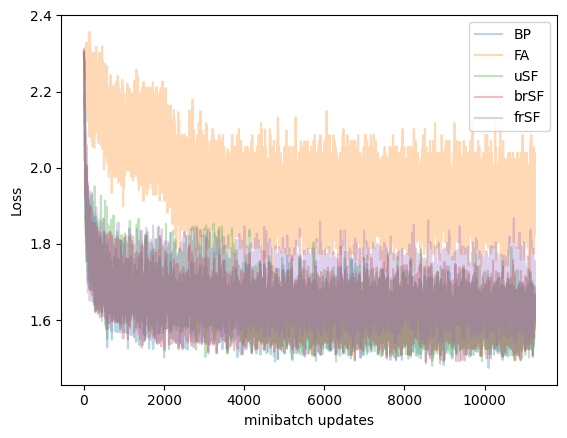

In [15]:
plt.plot(range(len(epoch_loss[0])), epoch_loss[0], label = "BP", alpha = 0.3)
plt.plot(range(len(epoch_loss[1])), epoch_loss[1], label = "FA", alpha = 0.3)
plt.plot(range(len(epoch_loss[2])), epoch_loss[2], label = "uSF", alpha = 0.3)
plt.plot(range(len(epoch_loss[3])), epoch_loss[3], label = "brSF", alpha = 0.3)
plt.plot(range(len(epoch_loss[4])), epoch_loss[4], label = "frSF", alpha = 0.3)
plt.legend(loc = "best")
plt.xlabel("minibatch updates")
plt.ylabel("Loss")
plt.show()

In [12]:
acc = [0, 0,0 ,0,0]
c = 0
for x,y in test_loader:
    c = c+1
    image_flatter = nn.Flatten()
    x = image_flatter(x)
    metric = torchmetrics.Accuracy(task = "multiclass", num_classes = 10)
    acc[0] += metric(bp_classifier(x), y)
    acc[1] += metric(fa_classifier(x), y)
    acc[2] += metric(usf_classifier(x), y)
    acc[3] += metric(brsf_classifier(x), y)
    acc[4] += metric(frsf_classifier(x), y)
print("Test Accuracy BackProp: ",acc[0]/c)
print("Test Accuracy Feedback Alignment: ",acc[1]/c)
print("Test Accuracy uSF: ",acc[2]/c)
print("Test Accuracy brSF: ",acc[3]/c)
print("Test Accuracy frSF: ",acc[4]/c)

Test Accuracy BackProp:  tensor(0.8534)
Test Accuracy Feedback Alignment:  tensor(0.5497)
Test Accuracy uSF:  tensor(0.8442)
Test Accuracy brSF:  tensor(0.8384)
Test Accuracy frSF:  tensor(0.7725)


In [13]:
torch.save(bp_classifier.state_dict(), "bp_dnn_classifier_model.pkl")
torch.save(fa_classifier.state_dict(), "fa_dnn_classifier_model.pkl")
torch.save(usf_classifier.state_dict(), "usf_dnn_classifier_model.pkl")
torch.save(brsf_classifier.state_dict(), "brsf_dnn_classifier_model.pkl")
torch.save(frsf_classifier.state_dict(), "frsf_dnn_classifier_model.pkl")